<a href="https://colab.research.google.com/github/muqadasrao/Ecode-camp-internship-task/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st


In [9]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [10]:
# print first 10 rows
df = pd.read_csv('breast-cancer.csv')
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [14]:
# Check for missing values
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [13]:
# Get information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
# Describe the dataset
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

**correlation matrix**

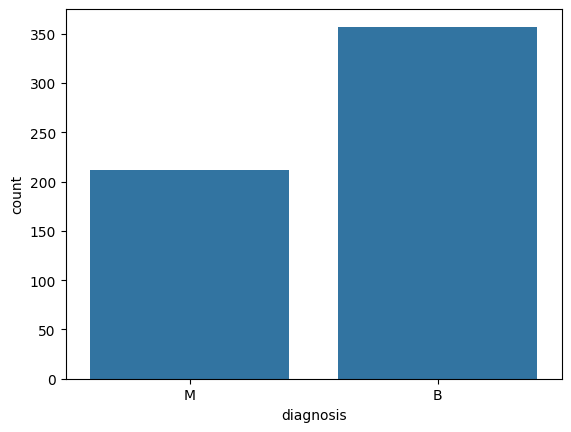

In [18]:
# Plot the distribution of diagnosis
sns.countplot(x='diagnosis', data=df)
plt.show()


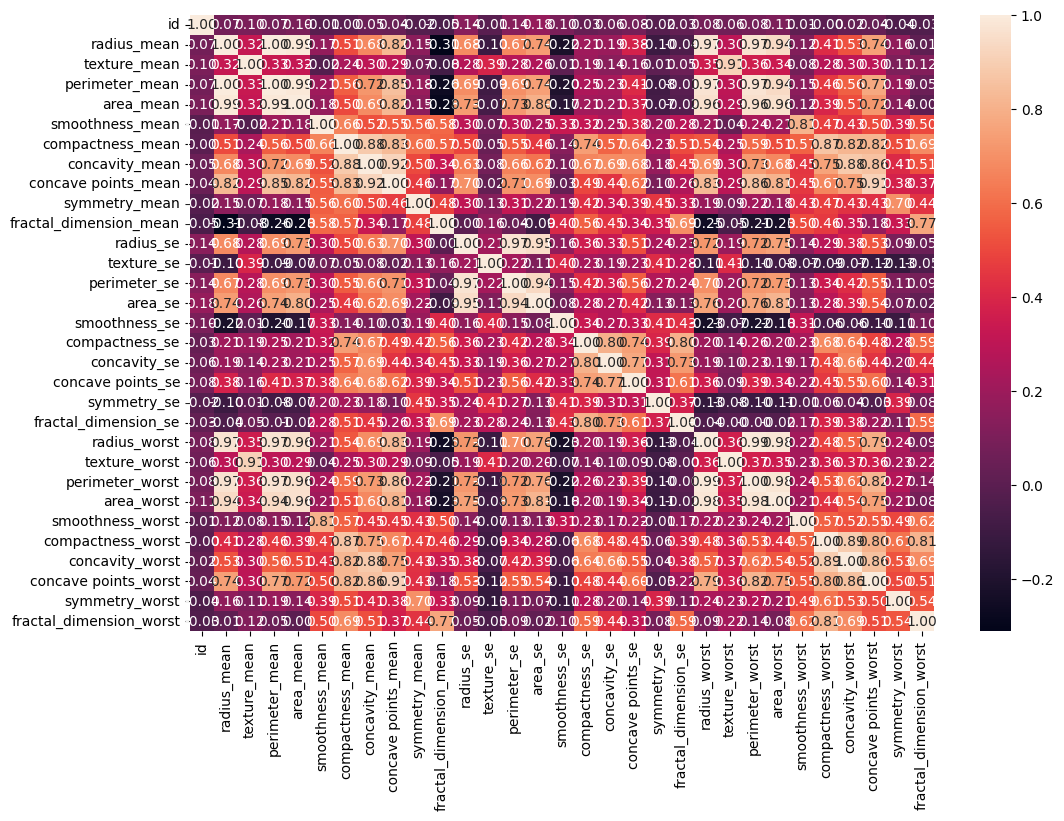

In [23]:
# Assuming 'df' is the DataFrame you want to use
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_features.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

**Data processing**

In [25]:
#drop unnecessary colomn
df.drop(['id'], axis=1, inplace=True)


In [26]:
#Encode target variable
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [27]:
#slpit data into feature & Target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [28]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Model Building**

In [30]:
svm_model = SVC(kernel='linear', probability=True)  # Linear kernel for SVM
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

**Model Evaluation**

Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



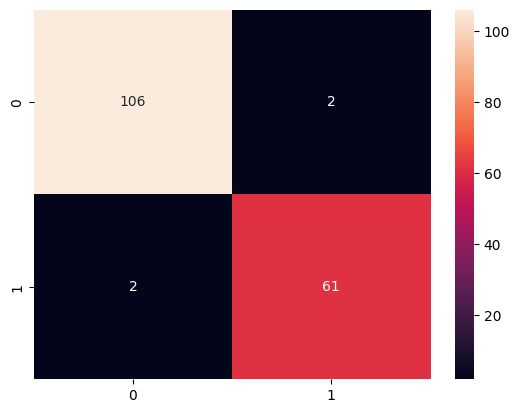

In [31]:
y_pred = svm_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


**Data Visualization**

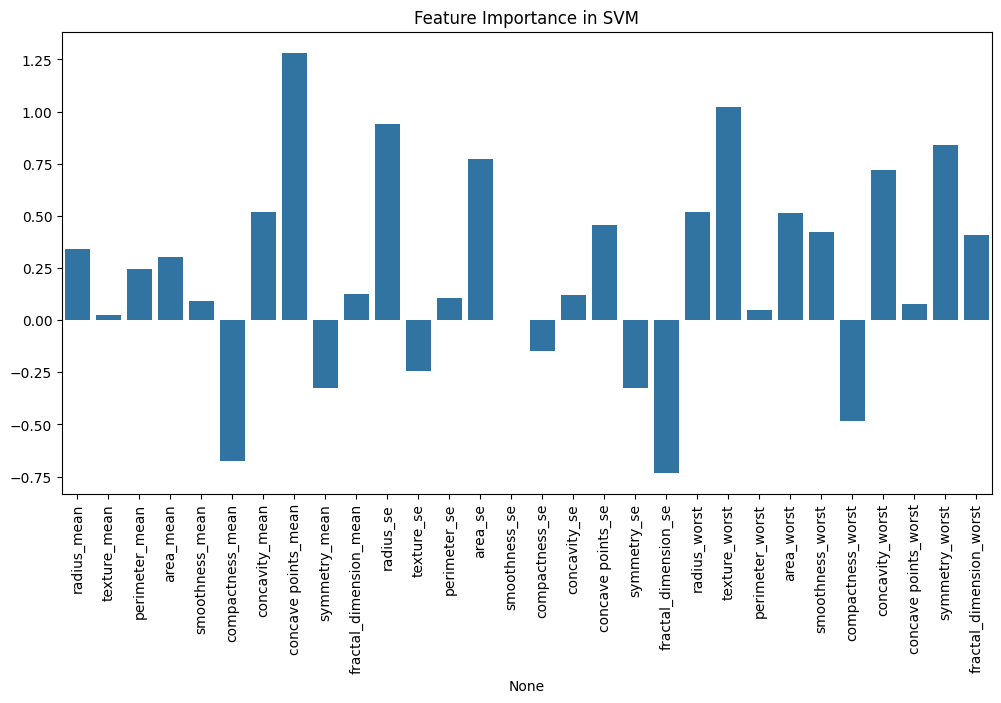

In [32]:
#correlation between features and the target.
plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=svm_model.coef_[0])
plt.xticks(rotation=90)
plt.title("Feature Importance in SVM")
plt.show()


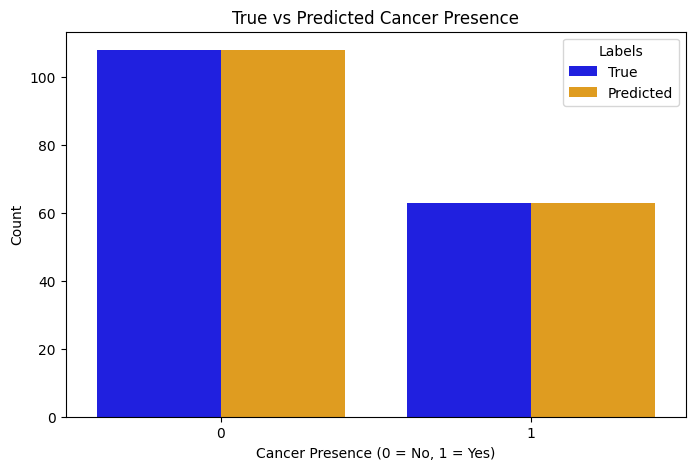

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for true and predicted values
data = pd.DataFrame({
    'Labels': ['True'] * len(y_test) + ['Predicted'] * len(y_pred),
    'Values': list(y_test) + list(y_pred)
})

# Create a count plot with different colors for True and Predicted
plt.figure(figsize=(8, 5))
sns.countplot(x='Values', hue='Labels', data=data, palette={'True': 'blue', 'Predicted': 'orange'})

# Add labels and title
plt.xlabel('Cancer Presence (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('True vs Predicted Cancer Presence')

# Show the legend
plt.legend(title='Labels')

# Show the plot
plt.show()


**Deployment**

In [54]:
!pip install streamlit pyngrok


In [55]:
%%writefile app.py
import streamlit as st

# Title of the app
st.title("Breast Cancer Prediction")

# Input fields for patient data
radius = st.number_input("Radius Mean", min_value=0.0)
texture = st.number_input("Texture Mean", min_value=0.0)
perimeter = st.number_input("Perimeter Mean", min_value=0.0)
area = st.number_input("Area Mean", min_value=0.0)
smoothness = st.number_input("Smoothness Mean", min_value=0.0)

# Predict button
if st.button("Predict"):
    # Dummy prediction logic (replace this with your model prediction)
    prediction = "Malignant" if radius > 12 else "Benign"
    st.success(f"The model predicts: {prediction}")


Overwriting app.py


In [ ]:
!streamlit run app.py --server.port 8501 &





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.27.188.196:8501



In [ ]:
from pyngrok import ngrok

# Set your ngrok authtoken (replace with your actual token)
ngrok.set_auth_token("2nQHqNK4ZprJCbaiLlV6LoBkjQV_6s67UKDLUqoYhYqZHLTGm")

# Create a tunnel to the Streamlit app
public_url = ngrok.connect(port='8501')
print("Streamlit app running on:", public_url)
